In [2]:
import numpy as np
import time
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.covariance import EmpiricalCovariance

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection

from scipy.stats import kurtosis

from sklearn.manifold import TSNE

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
def eig_95(pca): # return the number of components that explain 95% variance
    count = 1
    total_var = sum(pca.explained_variance_ratio_[:count])
    while (total_var < .95):
        count +=1
        total_var = sum(pca.explained_variance_ratio_[:count])
    return count

[0.72962445 0.22850762 0.03668922 0.00517871]
PCA n_components: 2
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
petal length (cm)
sepal width (cm)
RMSE Error: [0.4338721683416492, 0.1888645523358214, 0.061522902298104414, 7.705150536574276e-16]


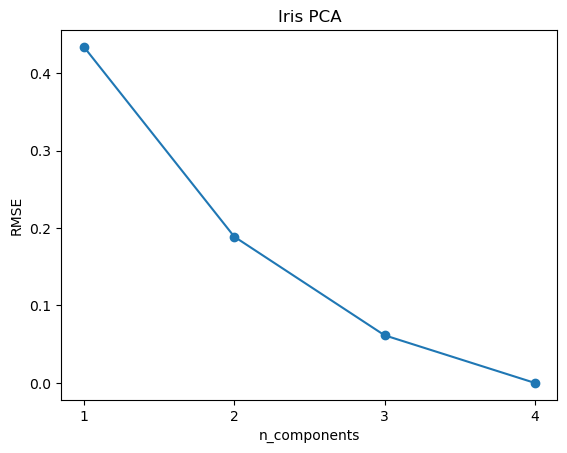

In [7]:
# Iris n components for PCA
iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
print("PCA n_components:", eig_95(pca))
pca_n_components_iris = eig_95(pca)

pca = PCA(n_components=pca_n_components_iris)
pca.fit(X)
print(iris.feature_names)

for i in range(pca_n_components_iris):
    index = np.argmax(pca.components_[i])
    print(iris.feature_names[index])

y_err = []
for k in range(1,5):
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X)
    X_rec = pca.inverse_transform(X_pca)
    pca_err = mean_squared_error(X, X_rec, squared=False)
    y_err.append(pca_err)

fig, ax = plt.subplots()
x_labels = [x for x in range(1,5)]
ax.set_xticks(x_labels)
ax.set_title("Iris PCA")
ax.set_xlabel("n_components")
ax.set_ylabel("RMSE")
ax.plot(x_labels, y_err, marker= 'o')
print("RMSE Error:", y_err)


In [44]:
# Iris KM PCA
X, y = datasets.load_iris(return_X_y=True)

pca =  PCA(n_components= pca_n_components_iris)
X_pca = pca.fit_transform(X)

utf_rand_scores = []
pca_rand_scores = []

utf_ss_scores = []
pca_ss_scores = []

utf_fit_times = []
pca_fit_times = []

for i in range(3):
    start = time.time()
    km_utf = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    km_pca = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)

    utf_labels = km_utf.predict(X)
    pca_labels = km_pca.predict(X_pca)
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_ss_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_ss_scores.append(metrics.silhouette_score(X, pca_labels))
    


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Var rand score:", np.var(utf_rand_scores))
print("Mean sil score:", np.mean(utf_ss_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Var rand score:", np.var(pca_rand_scores))
print("Mean sil score:", np.mean(pca_ss_scores))

* UTF results *
Mean times: 0.19988012313842773
Mean rand score: 0.5399218294207123
Var rand score: 0.0
Mean sil score: 0.6810461692117462
* PCA results *
Mean times: 0.18929107983907065
Mean rand score: 0.5399218294207123
Var rand score: 0.0
Mean sil score: 0.6810461692117462


[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
PCA n_components: 10
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst sy

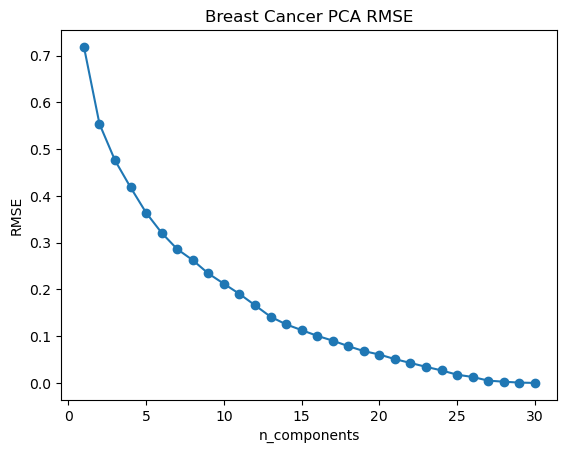

In [7]:
# BC n components for PCA
bc = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
print("PCA n_components:", eig_95(pca))
pca_n_components_bc = eig_95(pca)

pca = PCA(n_components=pca_n_components_bc)
pca.fit(X)
print(bc.feature_names)

# print primary axis of pc
for i in range(pca_n_components_bc):
    index = np.argmax(pca.components_[i])
    print(bc.feature_names[index])

y_err = []
for k in range(1,31):
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X)
    X_rec = pca.inverse_transform(X_pca)
    pca_err = mean_squared_error(X, X_rec, squared=False)
    y_err.append(pca_err)

fig, ax = plt.subplots()
x_labels = [x for x in range(1,31)]
ax.set_title("Breast Cancer PCA")
ax.set_xlabel("n_components")
ax.set_ylabel("RMSE")
ax.plot(x_labels, y_err, marker= 'o')
print(len(y_err))


In [46]:
# BC KM PCA
X, y = datasets.load_breast_cancer(return_X_y=True)

pca =  PCA(n_components= pca_n_components_bc)
X_pca = pca.fit_transform(X)

utf_rand_scores = []
pca_rand_scores = []

utf_ss_scores = []
pca_ss_scores = []

utf_fit_times = []
pca_fit_times = []

for i in range(3):
    start = time.time()
    km_utf = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    km_pca = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)

    utf_labels = km_utf.predict(X)
    pca_labels = km_pca.predict(X_pca)
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_ss_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_ss_scores.append(metrics.silhouette_score(X, pca_labels))
    


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Var rand score:", np.var(utf_rand_scores))
print("Mean sil score:", np.mean(utf_ss_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Var rand score:", np.var(pca_rand_scores))
print("Mean sil score:", np.mean(pca_ss_scores))

* UTF results *
Mean times: 0.2065133253733317
Mean rand score: 0.49142453622455523
Var rand score: 0.0
Mean sil score: 0.6972646156059464
* PCA results *
Mean times: 0.2002406120300293
Mean rand score: 0.49142453622455523
Var rand score: 0.0
Mean sil score: 0.6972646156059464


In [44]:
# Iris KM ICA
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ica =  FastICA(n_components= 1)
X_t = ica.fit_transform(X)

utf_rand_scores = []
ica_rand_scores = []

utf_ss_scores = []
ica_ss_scores = []

utf_fit_times = []
ica_fit_times = []

for i in range(3):
    start = time.time()
    km_utf = KMeans(n_clusters=3, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    km_pca = KMeans(n_clusters=3, random_state=np.random.randint(100)).fit(X_t)
    stop = time.time()
    ica_fit_times.append(stop-start)

    utf_labels = km_utf.predict(X)
    ica_labels = km_pca.predict(X_t)
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_ss_scores.append(metrics.silhouette_score(X, utf_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_ss_scores.append(metrics.silhouette_score(X, ica_labels))
    


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Var rand score:", np.var(utf_rand_scores))
print("Mean sil score:", np.mean(utf_ss_scores))
    
print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Var rand score:", np.var(ica_rand_scores))
print("Mean sil score:", np.mean(ica_ss_scores))

* UTF results *
Mean times: 0.40715686480204266
Mean rand score: 0.6075135512000608
Var rand score: 0.0001321053849269975
Mean sil score: 0.4607893987476191
* ICA results *
Mean times: 0.4479668935139974
Mean rand score: 0.8015498244339508
Var rand score: 0.0
Mean sil score: 0.3943708613036618


In [41]:
# Iris ICA kurtotis
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 


means = []
maxs = []

for k in range(1,5):
    ica = FastICA(n_components=k, whiten=False)
    X_t = ica.fit_transform(X)
    means.append(np.mean([abs(x) for x in kurtosis(X_t)]))
    maxs.append(np.max([abs(x) for x in kurtosis(X_t)]))

print("means:", means)
print("maxs:", maxs)

means: [0.8974589175396922, 0.6853429052411931, 0.5704670578068634, 0.8473670456428]
maxs: [1.3174123299534815, 1.377771032585281, 0.867319766608265, 1.251790488672599]


In [42]:
# BC ICA kurtotis
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 


means = []
maxs = []

for k in range(1,31):
    ica = FastICA(n_components=k,whiten=False)
    X_t = ica.fit_transform(X)
    means.append(np.mean([abs(x) for x in kurtosis(X_t)]))
    maxs.append(np.max([abs(x) for x in kurtosis(X_t)]))

print("means:", means)
print("maxs:", maxs)



means: [2.8782755404311855, 2.713366947063034, 2.4324303677291916, 2.489071284888703, 3.0515255583309524, 2.730917195368701, 2.8856578655211305, 2.733454877742393, 3.247702120642302, 3.079313214942269, 2.8742517864041783, 2.5874119041081487, 2.811755457166939, 2.855090696727144, 2.6441521930097065, 2.6865500263802264, 2.6771438985501983, 2.688397664540548, 2.506941140210275, 2.517162303711511, 3.26209920914716, 2.8396570733081217, 2.940769110032412, 2.8079039140416824, 2.621071923999706, 2.664340866613194, 2.7298239527919095, 2.745428416810974, 2.7342314215984644, 2.9106164726516783]
maxs: [19.33707614753913, 11.227392743294825, 7.168221630573722, 8.762389684920421, 21.458413417743536, 14.4291830523009, 22.37780591197678, 11.900343358904935, 25.622418450611118, 17.878306484369148, 20.073030513975805, 16.539683512287798, 21.8174038060696, 18.752047848936343, 12.169150498976276, 14.007863776039255, 10.18307382830561, 14.364099623559998, 7.544951269423446, 11.636652152819721, 24.927370245

In [36]:
# BC KM ICA
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ica =  FastICA(n_components= 7)
X_t = ica.fit_transform(X)

utf_rand_scores = []
ica_rand_scores = []

utf_ss_scores = []
ica_ss_scores = []

utf_fit_times = []
ica_fit_times = []

for i in range(3):
    start = time.time()
    km_utf = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    km_pca = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_t)
    stop = time.time()
    pca_fit_times.append(stop-start)

    utf_labels = km_utf.predict(X)
    ica_labels = km_pca.predict(X_t)
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_ss_scores.append(metrics.silhouette_score(X, utf_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_ss_scores.append(metrics.silhouette_score(X, ica_labels))
    


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Var rand score:", np.var(utf_rand_scores))
print("Mean sil score:", np.mean(utf_ss_scores))
    
print("* ICA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Var rand score:", np.var(ica_rand_scores))
print("Mean sil score:", np.mean(ica_ss_scores))

* UTF results *
Mean times: 0.4274919033050537
Mean rand score: 0.6593232854900388
Var rand score: 6.494993253667789e-05
Mean sil score: 0.34391282882833235
* ICA results *
Mean times: 0.4396449724833171
Mean rand score: 0.8025595416437173
Var rand score: 9.080908815476423e-06
Mean sil score: 0.3291190139754903


In [22]:
# Iris K means n-clusters tuning
X, y = datasets.load_iris(return_X_y=True)
ica = FastICA(n_components= 1)
X_ica= ica.fit_transform(X)

km = KMeans(n_clusters=3, random_state=np.random.randint(100)).fit(X_ica)
labels = km.predict(X_ica)
print("rand score", metrics.adjusted_rand_score(y, labels))
print("sil score:", metrics.silhouette_score(X, labels))

rand score 0.7726314170414115
sil score: 0.5482363439745941


In [ ]:
# Cancer ICA
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ica = FastICA()
ica.fit(X)

y1 = [kurtosis(x) for x in ica.components_]
x1 = [x for x in range(len(y1))]

plt.bar(x1,y1)
plt.show()

In [63]:
# Iris K means n-clusters tuning
X, y = datasets.load_iris(return_X_y=True)

ri_mean = []
si_mean = []
ri_var = []
si_var = []

for k in range(2,10):
    ri = []
    si = []
    for i in range(5):
        km = KMeans(n_clusters=k, random_state=np.random.randint(100)).fit(X)
        labels = km.predict(X)
        ri.append(metrics.adjusted_rand_score(y, labels))
        si.append(metrics.silhouette_score(X, labels))
    
    ri_mean.append(np.mean(ri))
    si_mean.append(np.mean(si))
    ri_var.append(np.var(ri))
    si_var.append(np.var(si))

print("rand scores:", ri_mean)
print("sil scores:", si_mean)
print("rand var:", ri_var)
print("sil var:", si_var)

rand scores: [0.5399218294207123, 0.7302382722834697, 0.6460873056499354, 0.6097193984858231, 0.45443514622162284, 0.4767608265251324, 0.45024074121019464, 0.3966325570623302]
sil scores: [0.6810461692117462, 0.5528190123564095, 0.497764873776067, 0.4897453241264425, 0.3653900624430323, 0.3541497437068809, 0.35523186488016334, 0.3242043853396518]
rand var: [0.0, 0.0, 3.335937022850914e-05, 4.984628447657009e-06, 5.0610564282707195e-05, 9.9749993694541e-05, 3.796269384195887e-05, 3.910188308822173e-05]
sil var: [0.0, 0.0, 1.2801956381029004e-07, 1.4893301421078467e-06, 5.4264594683557026e-06, 1.464773990970233e-05, 3.8380384160190755e-05, 1.852767716248628e-05]


In [67]:
# Breast Cancer K means n-clusters tuning
X, y = datasets.load_breast_cancer(return_X_y=True)

ri_mean = []
si_mean = []
ri_var = []
si_var = []

for k in range(2,6):
    ri = []
    si = []
    for i in range(3):
        km = KMeans(n_clusters=k, random_state=np.random.randint(100)).fit(X)
        labels = km.predict(X)
        ri.append(metrics.adjusted_rand_score(y, labels))
        si.append(metrics.silhouette_score(X, labels))
    
    ri_mean.append(np.mean(ri))
    si_mean.append(np.mean(si))
    ri_var.append(np.var(ri))
    si_var.append(np.var(si))

print("rand scores:", ri_mean)
print("sil scores:", si_mean)
print("rand var:", ri_var)
print("sil var:", si_var)

rand scores: [0.49142453622455523, 0.519652332268994, 0.4127431467179323, 0.3440006692233896]
sil scores: [0.6972646156059464, 0.6659438186306196, 0.5334614737117133, 0.5109382815790956]
rand var: [0.0, 3.028437524337243e-06, 0.0, 1.6394270753956293e-05]
sil var: [0.0, 9.071767409900556e-06, 0.0, 6.425778538656834e-07]


In [76]:
[x for x in range(10,60,10)]

[10, 20, 30, 40, 50]

In [ ]:
# TSNE Breast Cancer
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

kl_mean = []
km_ri = []
km_mi = []
km_si = []
gm_ri = []
gm_mi = []
gm_si = []

for k in range(10,60,10):
    kl = []
    kri = []
    kmi = []
    ksi= []
    gri = []
    gmi = []
    gsi = []
    for i in range(3):
        t = TSNE(n_components=3,perplexity=k, random_state=np.random.randint(100)).fit(X)
        kl.append(t.kl_divergence_)
        X_t = t.fit_transform(X)

        km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_t)
        gm = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit(X_t)

        km_labels = km.predict(X_t)
        kri.append(metrics.adjusted_rand_score(y, km_labels))
        kmi.append(metrics.normalized_mutual_info_score(y, km_labels))
        ksi.append(metrics.silhouette_score(X, km_labels))


        gm_labels = gm.predict(X_t)
        gri.append(metrics.adjusted_rand_score(y, gm_labels))
        gmi.append(metrics.normalized_mutual_info_score(y, gm_labels))
        gsi.append(metrics.silhouette_score(X, gm_labels))
    
    km_ri.append(np.mean(kri))
    km_mi.append(np.mean(kmi))
    km_si.append(np.mean(ksi))
    gm_ri.append(np.mean(gri))
    gm_mi.append(np.mean(gmi))
    gm_si.append(np.mean(gsi))
    kl_mean.append(np.mean(kl))
    
print("KL divergences", kl)
print("KM RI:", km_ri)
print("KM MI:", km_mi)
print("KM SI:", km_si)
print("GM RI:", gm_ri)
print("GM MI:", gm_mi)
print("GM SI:", gm_si)


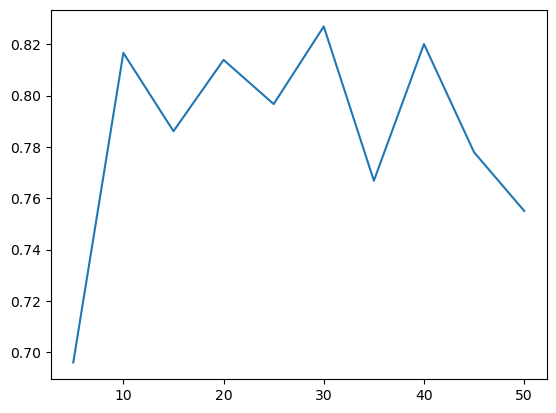

In [50]:
fig, ax = plt.subplots() 
ax.plot([k for k in range(10,60,10)],km_ri)

In [55]:
# TSNE Iris
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

kl_mean = []
km_ri = []
km_mi = []
km_si = []
gm_ri = []
gm_mi = []
gm_si = []

for k in range(10,60,10):
    kl = []
    kri = []
    kmi = []
    ksi= []
    gri = []
    gmi = []
    gsi = []
    for i in range(3):
        t = TSNE(n_components=2,perplexity=k, random_state=np.random.randint(100)).fit(X)
        kl.append(t.kl_divergence_)
        X_t = t.fit_transform(X)

        km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_t)
        gm = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit(X_t)

        km_labels = km.predict(X_t)
        kri.append(metrics.adjusted_rand_score(y, km_labels))
        kmi.append(metrics.normalized_mutual_info_score(y, km_labels))
        ksi.append(metrics.silhouette_score(X, km_labels))


        gm_labels = gm.predict(X_t)
        gri.append(metrics.adjusted_rand_score(y, gm_labels))
        gmi.append(metrics.normalized_mutual_info_score(y, gm_labels))
        gsi.append(metrics.silhouette_score(X, gm_labels))
    
    km_ri.append(np.mean(kri))
    km_mi.append(np.mean(kmi))
    km_si.append(np.mean(ksi))
    gm_ri.append(np.mean(gri))
    gm_mi.append(np.mean(gmi))
    gm_si.append(np.mean(gsi))
    kl_mean.append(np.mean(kl))
    
print("KL divergences", kl)
print("KM RI:", km_ri)
print("KM MI:", km_mi)
print("KM SI:", km_si)
print("GM RI:", gm_ri)
print("GM MI:", gm_mi)
print("GM SI:", gm_si)


KL divergences [0.08710253983736038, 0.08710253983736038, 0.08710253983736038]
KM RI: [0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855]
KM MI: [0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104]
KM SI: [0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808, 0.5817500491982808]
GM RI: [0.5194797526744529, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855]
GM MI: [0.6489948580277204, 0.7336804366512104, 0.7336804366512104, 0.7336804366512104, 0

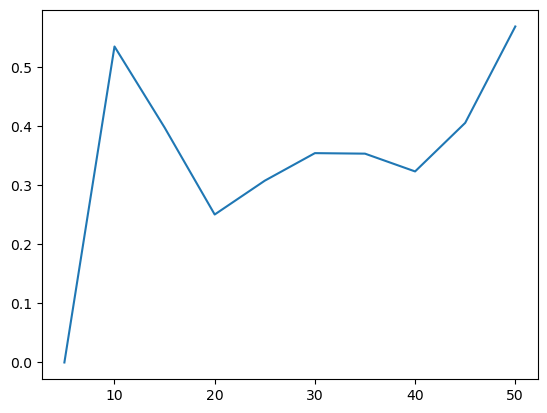

In [53]:
fig, ax = plt.subplots() 
ax.plot([k for k in range(5,55,5)],km_ri)

In [6]:
# BC KM
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 


utf_rand_scores = []
pca_rand_scores = []
ica_rand_scores = []
grp_rand_scores = []
emb_rand_scores = []

utf_sc_scores = []
pca_sc_scores = []
ica_sc_scores = []
grp_sc_scores = []
emb_sc_scores = []

utf_fit_times = []
pca_fit_times = []
ica_fit_times = []
grp_fit_times = []
emb_fit_times = []

for i in range(5):
    
    ica =  FastICA(n_components=7)
    X_ica = ica.fit_transform(X)

    pca =  PCA(n_components=10)
    X_pca = ica.fit_transform(X)

    grp = random_projection.GaussianRandomProjection(n_components= 10)
    X_grp = grp.fit_transform(X)

    X_emb = TSNE(n_components=3, perplexity=50).fit_transform(X)
    
    km = KMeans(n_clusters=2, random_state=np.random.randint(1000))
    
    start = time.time()
    utf_labels = km.fit_predict(X)
    stop = time.time()
    print("utf accuracy:",np.max([accuracy_score(y, utf_labels), 1- accuracy_score(y, utf_labels)]))
    utf_fit_times.append(stop-start)
    
    start = time.time()
    pca_labels = km.fit_predict(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)
    print("pca accuracy:",np.max([accuracy_score(y, pca_labels), 1- accuracy_score(y, pca_labels)]))
    
    start = time.time()
    ica_labels = km.fit_predict(X_ica)
    stop = time.time()
    ica_fit_times.append(stop-start)
    print("ica accuracy:",np.max([accuracy_score(y, ica_labels), 1- accuracy_score(y, ica_labels)]))
    
    start = time.time()
    grp_labels = km.fit_predict(X_grp)
    stop = time.time()
    grp_fit_times.append(stop-start)
    print("grp accuracy:",np.max([accuracy_score(y, grp_labels), 1- accuracy_score(y, grp_labels)]))
    
    start = time.time()
    emb_labels = km.fit_predict(X_emb)
    stop = time.time()
    emb_fit_times.append(stop-start)
    print("emb accuracy:",np.max([accuracy_score(y, emb_labels), 1- accuracy_score(y, emb_labels)]))
    
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_sc_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_sc_scores.append(metrics.silhouette_score(X, pca_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_sc_scores.append(metrics.silhouette_score(X, ica_labels))
    
    grp_rand_scores.append(metrics.adjusted_rand_score(y, grp_labels))
    grp_sc_scores.append(metrics.silhouette_score(X, grp_labels))
    
    emb_rand_scores.append(metrics.adjusted_rand_score(y, emb_labels))
    emb_sc_scores.append(metrics.silhouette_score(X, emb_labels))


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Mean MI score:", np.mean(utf_sc_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Mean MI score:", np.mean(pca_sc_scores))

print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Mean MI score:", np.mean(ica_sc_scores))

print("* GRP results *")
print("Mean times:", np.mean(grp_fit_times))
print("Mean rand score:", np.mean(grp_rand_scores))
print("Mean MI score:", np.mean(grp_sc_scores))

print("* TSNE results *")
print("Mean times:", np.mean(emb_fit_times))
print("Mean rand score:", np.mean(emb_rand_scores))
print("Mean MI score:", np.mean(emb_sc_scores))

utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

utf accuracy: 0.9050966608084359
pca accuracy: 0.9490333919156415
ica accuracy: 0.9490333919156415
grp accuracy: 0.8576449912126538
emb accuracy: 0.9543057996485061
utf accuracy: 0.9050966608084359
pca accuracy: 0.9490333919156415
ica accuracy: 0.9490333919156415
grp accuracy: 0.8471001757469244
emb accuracy: 0.9367311072056239
utf accuracy: 0.9050966608084359
pca accuracy: 0.945518453427065
ica accuracy: 0.945518453427065
grp accuracy: 0.8031634446397188
emb accuracy: 0.9472759226713533
utf accuracy: 0.9103690685413005
pca accuracy: 0.9490333919156415
ica accuracy: 0.9490333919156415
grp accuracy: 0.8014059753954306
emb accuracy: 0.9332161687170475
utf accuracy: 0.9103690685413005
pca accuracy: 0.9490333919156415
ica accuracy: 0.9490333919156415
grp accuracy: 0.7469244288224957
emb accuracy: 0.9261862917398945
* UTF results *
Mean times: 0.3115048885345459
Mean rand score: 0.6604630217098431
Mean MI score: 0.3440189464558433
* PCA results *
Mean times: 0.3199743747711182
Mean rand sco

In [5]:
utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

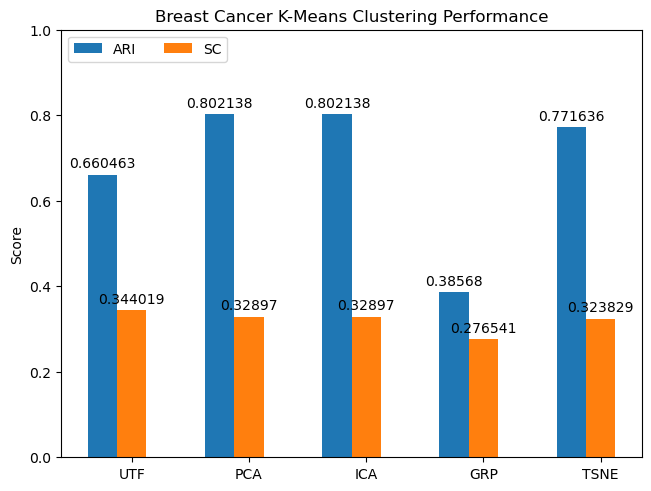

In [7]:
# BC plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Breast Cancer K-Means Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

Text(0.5, 1.0, 'Var Time')

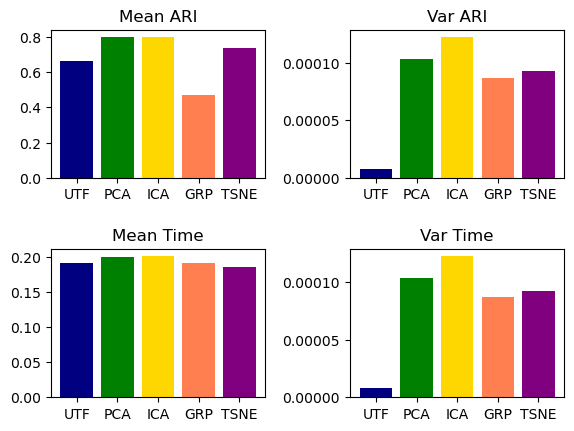

In [51]:
# BC KM stats plots
km_mean_scores = [np.mean(utf_rand_scores),np.mean(pca_rand_scores),np.mean(ica_rand_scores),
np.mean(grp_rand_scores),
np.mean(emb_rand_scores)]

km_var_scores = [np.var(utf_rand_scores),np.var(pca_rand_scores),np.var(ica_rand_scores),
np.var(grp_rand_scores),
np.var(emb_rand_scores)]

km_mean_time = [
np.mean(utf_fit_times), 
np.mean(pca_fit_times),
np.mean(ica_fit_times),
np.mean(grp_fit_times), 
np.mean(emb_fit_times) 
]

km_var_time = [
np.var(utf_fit_times), 
np.var(pca_fit_times),
np.var(ica_fit_times),
np.var(grp_fit_times), 
np.var(emb_fit_times) 
]

xlabels = ["UTF", "PCA", "ICA", "GRP", "TSNE"]
colors = ["navy", "green", "gold", "coral", "purple"]

fig, axs = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

axs[0,0].bar(xlabels, km_mean_scores, color=colors)
axs[0,0].set_title("Mean ARI")

axs[0,1].bar(xlabels, km_var_time, color=colors)
axs[0,1].set_title("Var ARI")

axs[1,0].bar(xlabels, km_mean_time, color=colors)
axs[1,0].set_title("Mean Time")

axs[1,1].bar(xlabels, km_var_time, color=colors)
axs[1,1].set_title("Var Time")

In [1]:
# BC GMM
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 


utf_rand_scores = []
pca_rand_scores = []
ica_rand_scores = []
grp_rand_scores = []
emb_rand_scores = []

utf_sc_scores = []
pca_sc_scores = []
ica_sc_scores = []
grp_sc_scores = []
emb_sc_scores = []

utf_fit_times = []
pca_fit_times = []
ica_fit_times = []
grp_fit_times = []
emb_fit_times = []

for i in range(10):
    
    ica =  FastICA(n_components=7)
    X_ica = ica.fit_transform(X)

    pca =  PCA(n_components=10)
    X_pca = ica.fit_transform(X)

    grp = random_projection.GaussianRandomProjection(n_components= 10)
    X_grp = grp.fit_transform(X)

    X_emb = TSNE(n_components=3, perplexity=30).fit_transform(X)
    
    km = GaussianMixture(n_components=2,covariance_type ='full', 
                         random_state=np.random.randint(100))
    
    start = time.time()
    utf_labels = km.fit_predict(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    pca_labels = km.fit_predict(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)
    
    start = time.time()
    ica_labels = km.fit_predict(X_ica)
    stop = time.time()
    ica_fit_times.append(stop-start)
    
    start = time.time()
    grp_labels = km.fit_predict(X_grp)
    stop = time.time()
    grp_fit_times.append(stop-start)
    
    start = time.time()
    emb_labels = km.fit_predict(X_emb)
    stop = time.time()
    emb_fit_times.append(stop-start)
    
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_sc_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_sc_scores.append(metrics.silhouette_score(X, pca_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_sc_scores.append(metrics.silhouette_score(X, ica_labels))
    
    grp_rand_scores.append(metrics.adjusted_rand_score(y, grp_labels))
    grp_sc_scores.append(metrics.silhouette_score(X, grp_labels))
    
    emb_rand_scores.append(metrics.adjusted_rand_score(y, emb_labels))
    emb_sc_scores.append(metrics.silhouette_score(X, emb_labels))


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Mean MI score:", np.mean(utf_sc_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Mean MI score:", np.mean(pca_sc_scores))

print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Mean MI score:", np.mean(ica_sc_scores))

print("* GRP results *")
print("Mean times:", np.mean(grp_fit_times))
print("Mean rand score:", np.mean(grp_rand_scores))
print("Mean MI score:", np.mean(grp_sc_scores))

print("* TSNE results *")
print("Mean times:", np.mean(emb_fit_times))
print("Mean rand score:", np.mean(emb_rand_scores))
print("Mean MI score:", np.mean(emb_sc_scores))

utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

# BC plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Breast Cancer GMM Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

NameError: name 'datasets' is not defined

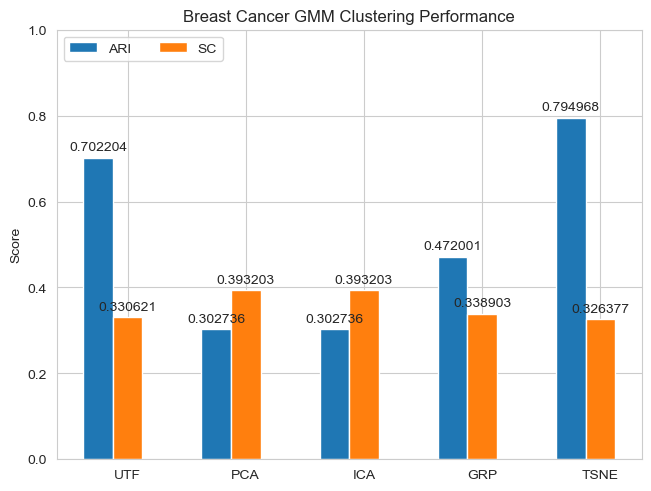

In [193]:
# BC plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Breast Cancer GMM Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

Text(0.5, 1.0, 'Var Time')

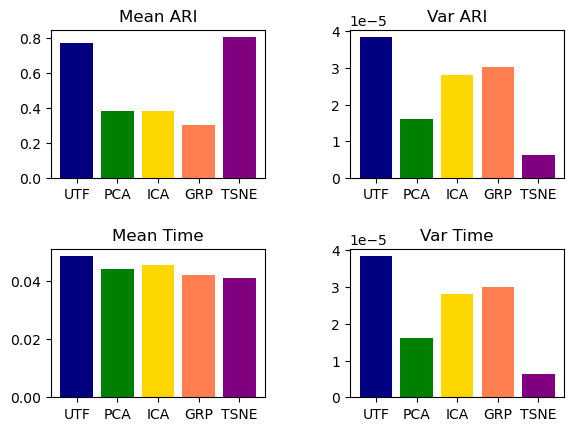

In [53]:
# BC KM stats plots
km_mean_scores = [np.mean(utf_rand_scores),np.mean(pca_rand_scores),np.mean(ica_rand_scores),
np.mean(grp_rand_scores),
np.mean(emb_rand_scores)]

km_var_scores = [np.var(utf_rand_scores),np.var(pca_rand_scores),np.var(ica_rand_scores),
np.var(grp_rand_scores),
np.var(emb_rand_scores)]

km_mean_time = [
np.mean(utf_fit_times), 
np.mean(pca_fit_times),
np.mean(ica_fit_times),
np.mean(grp_fit_times), 
np.mean(emb_fit_times) 
]

km_var_time = [
np.var(utf_fit_times), 
np.var(pca_fit_times),
np.var(ica_fit_times),
np.var(grp_fit_times), 
np.var(emb_fit_times) 
]

xlabels = ["UTF", "PCA", "ICA", "GRP", "TSNE"]
colors = ["navy", "green", "gold", "coral", "purple"]

fig, axs = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

axs[0,0].bar(xlabels, km_mean_scores, color=colors)
axs[0,0].set_title("Mean ARI")

axs[0,1].bar(xlabels, km_var_time, color=colors)
axs[0,1].set_title("Var ARI")

axs[1,0].bar(xlabels, km_mean_time, color=colors)
axs[1,0].set_title("Mean Time")

axs[1,1].bar(xlabels, km_var_time, color=colors)
axs[1,1].set_title("Var Time")

In [10]:
# Iris n components for PCA
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
print("PCA n_components:", eig_95(pca))

X_pca = pca.fit_transform(X)
X_rec = pca.inverse_transform(X_pca)

pca_err = mean_squared_error(X, X_rec)
print("reconstruction MSE:", pca_err)

[0.72962445 0.22850762 0.03668922 0.00517871]
PCA n_components: 2
reconstruction MSE: 6.896779807807682e-31


In [11]:
# Iris TSNE components
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

t2 = TSNE(n_components=2).fit(X)
t3 = TSNE(n_components=3).fit(X)

print("KL-div for n=2", t2.kl_divergence_)
print("KL-div for n=3", t3.kl_divergence_)

KL-div for n=2 0.148529052734375
KL-div for n=3 0.3585124611854553


[[-0.19256327 -0.01345371  1.038119    0.12234715]
 [-0.54340766  1.28570183  1.78470929 -0.73625382]
 [-0.34137396  0.15912535  4.13077276 -3.86955084]
 [-2.57367701  0.64987738  3.15203678 -0.74813984]]


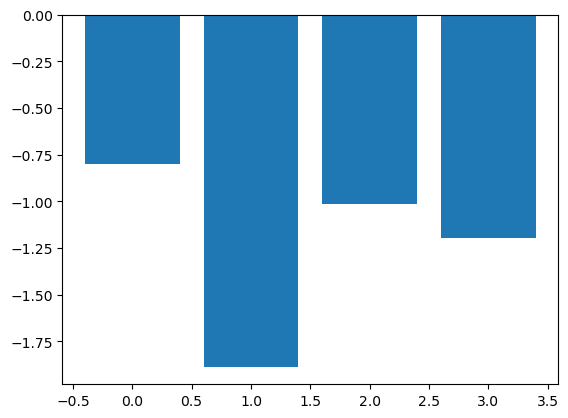

In [14]:
# Cancer ICA
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ica = FastICA()
ica.fit(X)
print(ica.components_)

y1 = [kurtosis(x) for x in ica.components_]
x1 = [x for x in range(len(y1))]

plt.bar(x1,y1)
plt.show()

In [194]:
# Iris KM
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 


utf_rand_scores = []
pca_rand_scores = []
ica_rand_scores = []
grp_rand_scores = []
emb_rand_scores = []

utf_sc_scores = []
pca_sc_scores = []
ica_sc_scores = []
grp_sc_scores = []
emb_sc_scores = []

utf_fit_times = []
pca_fit_times = []
ica_fit_times = []
grp_fit_times = []
emb_fit_times = []

for i in range(5):
    
    ica =  FastICA(n_components=1)
    X_ica = ica.fit_transform(X)

    pca =  PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    grp = random_projection.GaussianRandomProjection(n_components= 2)
    X_grp = grp.fit_transform(X)

    X_emb = TSNE(n_components=2, perplexity=10).fit_transform(X)
    
    km = KMeans(n_clusters=2, random_state=np.random.randint(100))
    
    start = time.time()
    utf_labels = km.fit_predict(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    pca_labels = km.fit_predict(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)
    
    start = time.time()
    ica_labels = km.fit_predict(X_ica)
    stop = time.time()
    ica_fit_times.append(stop-start)
    
    start = time.time()
    grp_labels = km.fit_predict(X_grp)
    stop = time.time()
    grp_fit_times.append(stop-start)
    
    start = time.time()
    emb_labels = km.fit_predict(X_emb)
    stop = time.time()
    emb_fit_times.append(stop-start)
    
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_sc_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_sc_scores.append(metrics.silhouette_score(X, pca_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_sc_scores.append(metrics.silhouette_score(X, ica_labels))
    
    grp_rand_scores.append(metrics.adjusted_rand_score(y, grp_labels))
    grp_sc_scores.append(metrics.silhouette_score(X, grp_labels))
    
    emb_rand_scores.append(metrics.adjusted_rand_score(y, emb_labels))
    emb_sc_scores.append(metrics.silhouette_score(X, emb_labels))


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Mean SC score:", np.mean(utf_sc_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Mean SC score:", np.mean(pca_sc_scores))

print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Mean SC score:", np.mean(ica_sc_scores))

print("* GRP results *")
print("Mean times:", np.mean(grp_fit_times))
print("Mean rand score:", np.mean(grp_rand_scores))
print("Mean SC score:", np.mean(grp_sc_scores))

print("* TSNE results *")
print("Mean times:", np.mean(emb_fit_times))
print("Mean rand score:", np.mean(emb_rand_scores))
print("Mean SC score:", np.mean(emb_sc_scores))

utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

* UTF results *
Mean times: 0.30164494514465334
Mean rand score: 0.5681159420289855
Mean SC score: 0.5817500491982808
* PCA results *
Mean times: 0.2969400405883789
Mean rand score: 0.5681159420289855
Mean SC score: 0.5817500491982808
* ICA results *
Mean times: 0.3018000602722168
Mean rand score: 0.5681159420289855
Mean SC score: 0.5817500491982808
* GRP results *
Mean times: 0.3005415916442871
Mean rand score: 0.3850921558204312
Mean SC score: 0.44343495577344216
* TSNE results *
Mean times: 0.28682565689086914
Mean rand score: 0.5681159420289855
Mean SC score: 0.5817500491982808


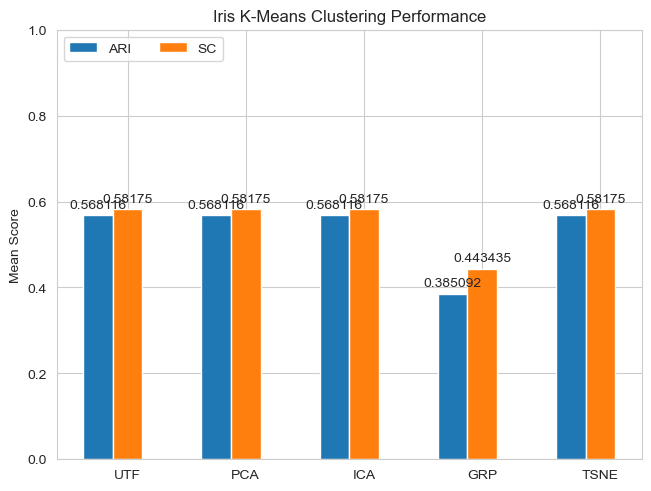

In [195]:
# Iris KM plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Score')
ax.set_title('Iris K-Means Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

Text(0.5, 1.0, 'Var Time')

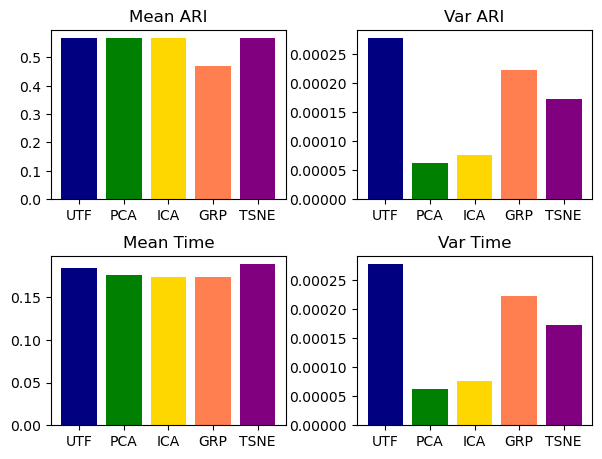

In [5]:
km_mean_scores = [np.mean(utf_rand_scores),np.mean(pca_rand_scores),np.mean(ica_rand_scores),
np.mean(grp_rand_scores),
np.mean(emb_rand_scores)]

km_var_scores = [np.var(utf_rand_scores),np.var(pca_rand_scores),np.var(ica_rand_scores),
np.var(grp_rand_scores),
np.var(emb_rand_scores)]

km_mean_time = [
np.mean(utf_fit_times), 
np.mean(pca_fit_times),
np.mean(ica_fit_times),
np.mean(grp_fit_times), 
np.mean(emb_fit_times) 
]

km_var_time = [
np.var(utf_fit_times), 
np.var(pca_fit_times),
np.var(ica_fit_times),
np.var(grp_fit_times), 
np.var(emb_fit_times) 
]

xlabels = ["UTF", "PCA", "ICA", "GRP", "TSNE"]
colors = ["navy", "green", "gold", "coral", "purple"]

fig, axs = plt.subplots(2,2)
fig.tight_layout(pad=2.0)

axs[0,0].bar(xlabels, km_mean_scores, color=colors)
axs[0,0].set_title("Mean ARI")

axs[0,1].bar(xlabels, km_var_time, color=colors)
axs[0,1].set_title("Var ARI")

axs[1,0].bar(xlabels, km_mean_time, color=colors)
axs[1,0].set_title("Mean Time")

axs[1,1].bar(xlabels, km_var_time, color=colors)
axs[1,1].set_title("Var Time")

* UTF results *
Mean times: 0.30042576789855957
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* PCA results *
Mean times: 0.2771153450012207
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* ICA results *
Mean times: 0.28681055704752606
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* GRP results *
Mean times: 0.28803467750549316
Mean rand score: 0.39439225295661107
Mean MI score: 0.4466198533014805
* TSNE results *
Mean times: 0.25739248593648273
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808


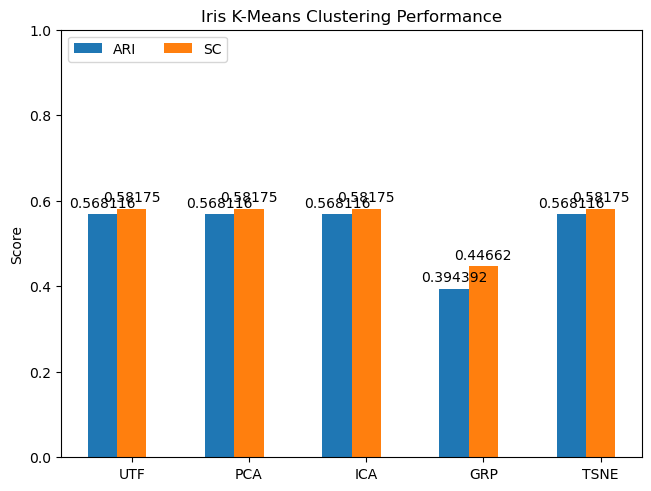

In [5]:
# Iris GMM
X, y = datasets.load_iris(return_X_y=True)
X_unscaled = X
X = StandardScaler().fit_transform(X) 


utf_rand_scores = []
pca_rand_scores = []
ica_rand_scores = []
grp_rand_scores = []
emb_rand_scores = []

utf_sc_scores = []
pca_sc_scores = []
ica_sc_scores = []
grp_sc_scores = []
emb_sc_scores = []

utf_fit_times = []
pca_fit_times = []
ica_fit_times = []
grp_fit_times = []
emb_fit_times = []

for i in range(3):
    
    ica =  FastICA(n_components=1)
    X_ica = ica.fit_transform(X)

    pca =  PCA(n_components=2)
    X_pca = ica.fit_transform(X)

    grp = random_projection.GaussianRandomProjection(n_components= 2)
    X_grp = grp.fit_transform(X)

    X_emb = TSNE(n_components=2, perplexity=10).fit_transform(X)
    
    km = KMeans(n_clusters=2)
    
    start = time.time()
    utf_labels = km.fit_predict(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    pca_labels = km.fit_predict(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)
    
    start = time.time()
    ica_labels = km.fit_predict(X_ica)
    stop = time.time()
    ica_fit_times.append(stop-start)
    
    start = time.time()
    grp_labels = km.fit_predict(X_grp)
    stop = time.time()
    grp_fit_times.append(stop-start)
    
    start = time.time()
    emb_labels = km.fit_predict(X_emb)
    stop = time.time()
    emb_fit_times.append(stop-start)
    
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_sc_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_sc_scores.append(metrics.silhouette_score(X, pca_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_sc_scores.append(metrics.silhouette_score(X, ica_labels))
    
    grp_rand_scores.append(metrics.adjusted_rand_score(y, grp_labels))
    grp_sc_scores.append(metrics.silhouette_score(X, grp_labels))
    
    emb_rand_scores.append(metrics.adjusted_rand_score(y, emb_labels))
    emb_sc_scores.append(metrics.silhouette_score(X, emb_labels))


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Mean MI score:", np.mean(utf_sc_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Mean MI score:", np.mean(pca_sc_scores))

print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Mean MI score:", np.mean(ica_sc_scores))

print("* GRP results *")
print("Mean times:", np.mean(grp_fit_times))
print("Mean rand score:", np.mean(grp_rand_scores))
print("Mean MI score:", np.mean(grp_sc_scores))

print("* TSNE results *")
print("Mean times:", np.mean(emb_fit_times))
print("Mean rand score:", np.mean(emb_rand_scores))
print("Mean MI score:", np.mean(emb_sc_scores))

utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

# Iris GMM plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Iris K-Means Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0,1)

plt.show()

* UTF results *
Mean times: 0.08092633883158366
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* PCA results *
Mean times: 0.05061149597167969
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* ICA results *
Mean times: 0.050855398178100586
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808
* GRP results *
Mean times: 0.054242849349975586
Mean rand score: 0.5270561168106216
Mean MI score: 0.5606012203029662
* TSNE results *
Mean times: 0.05462940533955892
Mean rand score: 0.5681159420289855
Mean MI score: 0.5817500491982808


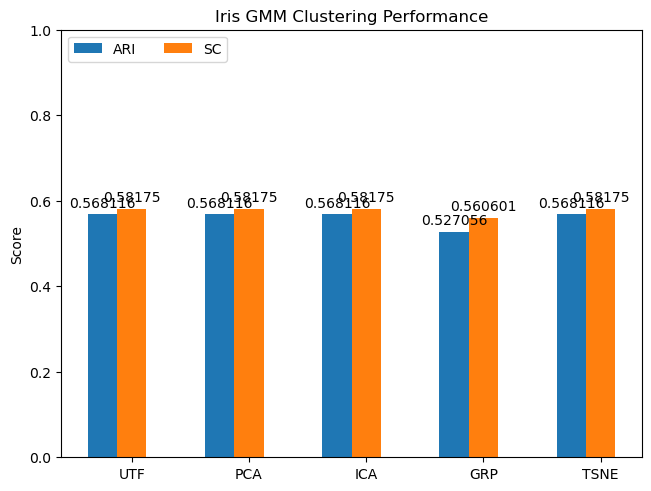

In [4]:
# Iris GMM
X, y = datasets.load_iris(return_X_y=True)
X_unscaled = X
X = StandardScaler().fit_transform(X) 


utf_rand_scores = []
pca_rand_scores = []
ica_rand_scores = []
grp_rand_scores = []
emb_rand_scores = []

utf_sc_scores = []
pca_sc_scores = []
ica_sc_scores = []
grp_sc_scores = []
emb_sc_scores = []

utf_fit_times = []
pca_fit_times = []
ica_fit_times = []
grp_fit_times = []
emb_fit_times = []

for i in range(3):
    
    ica =  FastICA(n_components=1)
    X_ica = ica.fit_transform(X)

    pca =  PCA(n_components=2)
    X_pca = ica.fit_transform(X)

    grp = random_projection.GaussianRandomProjection(n_components= 2)
    X_grp = grp.fit_transform(X)

    X_emb = TSNE(n_components=2, perplexity=10).fit_transform(X)
    
    km = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100))
    
    start = time.time()
    utf_labels = km.fit_predict(X)
    stop = time.time()
    utf_fit_times.append(stop-start)
    
    start = time.time()
    pca_labels = km.fit_predict(X_pca)
    stop = time.time()
    pca_fit_times.append(stop-start)
    
    start = time.time()
    ica_labels = km.fit_predict(X_ica)
    stop = time.time()
    ica_fit_times.append(stop-start)
    
    start = time.time()
    grp_labels = km.fit_predict(X_grp)
    stop = time.time()
    grp_fit_times.append(stop-start)
    
    start = time.time()
    emb_labels = km.fit_predict(X_emb)
    stop = time.time()
    emb_fit_times.append(stop-start)
    
    
    utf_rand_scores.append(metrics.adjusted_rand_score(y, utf_labels))
    utf_sc_scores.append(metrics.silhouette_score(X, utf_labels))
    
    pca_rand_scores.append(metrics.adjusted_rand_score(y, pca_labels))
    pca_sc_scores.append(metrics.silhouette_score(X, pca_labels))
    
    ica_rand_scores.append(metrics.adjusted_rand_score(y, ica_labels))
    ica_sc_scores.append(metrics.silhouette_score(X, ica_labels))
    
    grp_rand_scores.append(metrics.adjusted_rand_score(y, grp_labels))
    grp_sc_scores.append(metrics.silhouette_score(X, grp_labels))
    
    emb_rand_scores.append(metrics.adjusted_rand_score(y, emb_labels))
    emb_sc_scores.append(metrics.silhouette_score(X, emb_labels))


print("* UTF results *")
print("Mean times:", np.mean(utf_fit_times))
print("Mean rand score:", np.mean(utf_rand_scores))
print("Mean MI score:", np.mean(utf_sc_scores))
    
print("* PCA results *")
print("Mean times:", np.mean(pca_fit_times))
print("Mean rand score:", np.mean(pca_rand_scores))
print("Mean MI score:", np.mean(pca_sc_scores))

print("* ICA results *")
print("Mean times:", np.mean(ica_fit_times))
print("Mean rand score:", np.mean(ica_rand_scores))
print("Mean MI score:", np.mean(ica_sc_scores))

print("* GRP results *")
print("Mean times:", np.mean(grp_fit_times))
print("Mean rand score:", np.mean(grp_rand_scores))
print("Mean MI score:", np.mean(grp_sc_scores))

print("* TSNE results *")
print("Mean times:", np.mean(emb_fit_times))
print("Mean rand score:", np.mean(emb_rand_scores))
print("Mean MI score:", np.mean(emb_sc_scores))

utf_rand = np.mean(utf_rand_scores)
pca_rand = np.mean(pca_rand_scores)
ica_rand = np.mean(ica_rand_scores)
grp_rand = np.mean(grp_rand_scores)
emb_rand = np.mean(emb_rand_scores)

utf_sc = np.mean(utf_sc_scores)
pca_sc = np.mean(pca_sc_scores)
ica_sc = np.mean(ica_sc_scores)
grp_sc = np.mean(grp_sc_scores)
emb_sc = np.mean(emb_sc_scores)

# Iris GMM plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Iris GMM Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0,1)

plt.show()

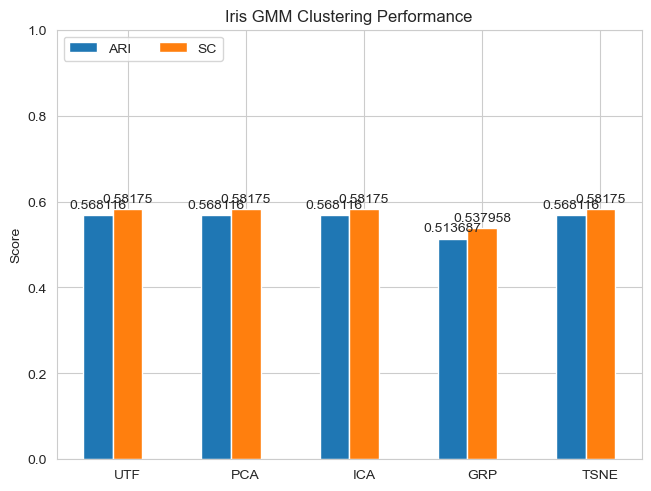

In [197]:
# Iris GMM plots
species = ("UTF", "PCA", "ICA", "GRP", "TSNE")
penguin_means = {
    'ARI': (utf_rand, pca_rand, ica_rand, grp_rand, emb_rand),
    'SC': (utf_sc, pca_sc, ica_sc, grp_sc, emb_sc),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Iris GMM Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0,1)

plt.show()

In [53]:
# Cancer TSNE plot 
colors = ['yellow', 'green', 'purple']

X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 
X_emb = TSNE(n_components=3, perplexity= 50).fit_transform(X)


ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_emb[:,0],X_emb[:,1],X_emb[:,2])

[ 8.242036   -0.47098908  0.12525472]


In [21]:
datasets.load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
# Cancer K-means cluster silhouette vs PCA n_components
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 


bc_sil_score_means = []
bc_rand_score_means = []
bc_mi_score_means = []

for i in range(1,31):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    sil_scores = []
    rand_scores = []
    mi_scores = []
    
    for k in range(3):
        km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_pca)
        labels = km.predict(X_pca)
        
        sil_score = metrics.silhouette_score(X, labels)
        sil_scores.append(sil_score)
        
        rand_score = metrics.adjusted_rand_score(y, labels)
        rand_scores.append(rand_score)
        
        mi_score = metrics.adjusted_mutual_info_score(y, labels)
        mi_scores.append(mi_score)
        
    bc_sil_score_means.append(np.mean(sil_scores))
    bc_rand_score_means.append(np.mean(rand_scores))
    bc_mi_score_means.append(np.mean(mi_scores))

print("sil scores", bc_sil_score_means)
print("rand scores", bc_rand_score_means)
print("MI scores", bc_sil_score_means)

sil scores [0.34508233955254614, 0.34535008214161556, 0.34497400510344073, 0.34497400510344073, 0.34497400510344073, 0.34497400510344073, 0.34497400510344073, 0.344894148289329, 0.34497400510344073, 0.34391282882833235, 0.34368574161055454, 0.3444434169658866, 0.34497400510344073, 0.3444434169658866, 0.34497400510344073, 0.34391282882833235, 0.34391282882833235, 0.34421632974810884, 0.3444434169658866, 0.3444434169658866, 0.34497400510344073, 0.3444434169658866, 0.3444434169658866, 0.3444434169658866, 0.3444434169658866, 0.3433822406907782, 0.3444434169658866, 0.34497400510344073, 0.34391282882833235, 0.3444434169658866]
rand scores [0.6649625478425899, 0.6592305570949524, 0.6707206476880808, 0.6707206476880808, 0.6707206476880808, 0.6707206476880808, 0.6707206476880808, 0.6726487303365616, 0.6707206476880808, 0.6593232854900388, 0.6612574746665979, 0.6650219665890599, 0.6707206476880808, 0.6650219665890598, 0.6707206476880808, 0.6593232854900388, 0.6593232854900388, 0.6669561557656188

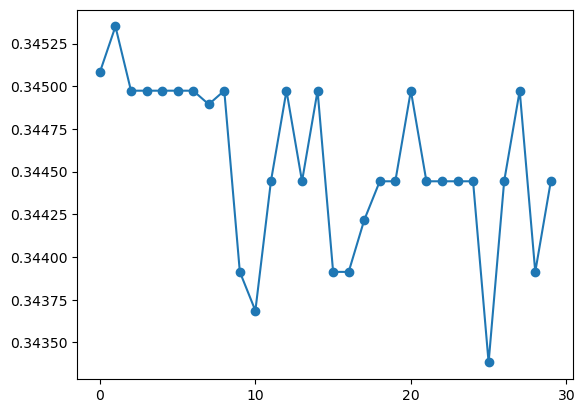

In [56]:
fig, ax = plt.subplots()
ax.xaxis.set_ticks( [x for x in range(0,40,10)])
ax.plot(bc_sil_score_means, marker="o")

In [36]:
# Iris K-means cluster silhouette vs PCA n_components
X, y = datasets.load_iris(return_X_y=True)

ir_sil_score_means = []
ir_rand_score_means = []
ir_mi_score_means = []

for i in range(1,5):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    sil_scores = []
    rand_scores = []
    mi_scores = []
    
    for k in range(3):
        km = KMeans(n_clusters=3, random_state=np.random.randint(100)).fit(X_pca)
        labels = km.predict(X_pca)
        
        sil_score = metrics.silhouette_score(X, labels)
        sil_scores.append(sil_score)
        
        rand_score = metrics.adjusted_rand_score(y, labels)
        rand_scores.append(rand_score)
        
        mi_score = metrics.normalized_mutual_info_score(y, labels)
        mi_scores.append(mi_score)
        
    ir_sil_score_means.append(np.mean(sil_scores))
    ir_rand_score_means.append(np.mean(rand_scores))
    ir_mi_score_means.append(np.mean(mi_scores))

print("sil scores", ir_sil_score_means)
print("rand scores", ir_rand_score_means)
print("MI scores", ir_sil_score_means)

sil scores [0.5482363439745941, 0.551191604619592, 0.5528190123564095, 0.5528190123564095]
rand scores [0.7726314170414114, 0.7163421126838476, 0.7302382722834698, 0.7302382722834698]
MI scores [0.5482363439745941, 0.551191604619592, 0.5528190123564095, 0.5528190123564095]


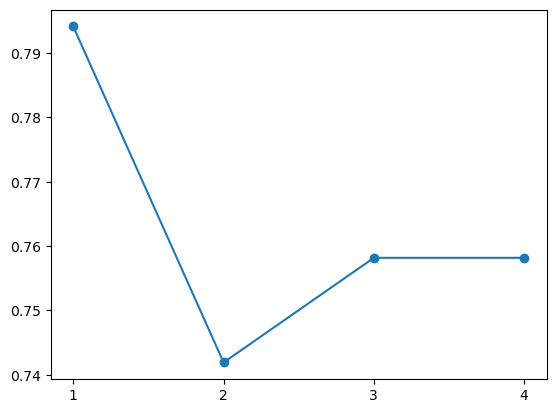

In [37]:
fig, ax = plt.subplots()
ax.xaxis.set_ticks( [x for x in range(1,5)])
ax.plot(x_labels, mi_score_means, marker="o")

In [38]:
# Covariance matrice

X, y = datasets.load_iris(return_X_y=True)

np.cov(X)

array([[4.75      , 4.42166667, 4.35333333, ..., 2.915     , 2.475     ,
        2.6       ],
       [4.42166667, 4.14916667, 4.055     , ..., 2.95583333, 2.50416667,
        2.62833333],
       [4.35333333, 4.055     , 3.99      , ..., 2.68833333, 2.28166667,
        2.39666667],
       ...,
       [2.915     , 2.95583333, 2.68833333, ..., 4.18916667, 3.65083333,
        3.835     ],
       [2.475     , 2.50416667, 2.28166667, ..., 3.65083333, 3.20916667,
        3.375     ],
       [2.6       , 2.62833333, 2.39666667, ..., 3.835     , 3.375     ,
        3.55      ]])

In [ ]:
# TSNE Iris
X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

kl_mean = []
km_ri = []
km_mi = []
km_si = []
gm_ri = []
gm_mi = []
gm_si = []

for k in range(5,55,5):
    kl = []
    kri = []
    kmi = []
    ksi= []
    gri = []
    gmi = []
    gsi = []
    for i in range(3):
        t = TSNE(n_components=3,perplexity=k, random_state=np.random.randint(100)).fit(X)
        kl.append(t.kl_divergence_)
        X_t = t.fit_transform(X)

        km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X_t)
        gm = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit(X_t)

        km_labels = km.predict(X_t)
        kri.append(metrics.adjusted_rand_score(y, km_labels))
        kmi.append(metrics.normalized_mutual_info_score(y, km_labels))
        ksi.append(metrics.silhouette_score(X, km_labels))


        gm_labels = gm.predict(X_t)
        gri.append(metrics.adjusted_rand_score(y, gm_labels))
        gmi.append(metrics.normalized_mutual_info_score(y, gm_labels))
        gsi.append(metrics.silhouette_score(X, gm_labels))
    
    km_ri.append(np.mean(kri))
    km_mi.append(np.mean(kmi))
    km_si.append(np.mean(ksi))
    gm_ri.append(np.mean(gri))
    gm_mi.append(np.mean(gmi))
    gm_si.append(np.mean(gsi))
    kl_mean.append(np.mean(kl))
    
print("KL divergences", kl)
print("KM RI:", km_ri)
print("KM MI:", km_mi)
print("KM SI:", km_si)
print("GM RI:", gm_ri)
print("GM MI:", gm_mi)
print("GM SI:", gm_si)


In [50]:
iris,y = datasets.load_iris(return_X_y=True)
bc,y = datasets.load_breast_cancer(return_X_y=True)
iris = StandardScaler().fit_transform(iris)
bc = StandardScaler().fit_transform(bc)

pca_ir = PCA().fit(iris)
pca_bc = PCA().fit(bc)

print("Iris principle components:", pca_ir.components_)
print("Cancer principle components:", pca_bc.components_[:2])

print(pca_ir.explained_variance_ratio_[:4])
print(pca_bc.explained_variance_ratio_[:4])

Iris principle components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Cancer principle components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947

In [14]:
iris,y = datasets.load_iris(return_X_y=True)
bc,y = datasets.load_breast_cancer(return_X_y=True)
iris = StandardScaler().fit_transform(iris)
bc = StandardScaler().fit_transform(bc)

ica_ir = FastICA().fit(iris)
ica_bc = FastICA().fit(bc)

print("Iris independent components:", ica_ir.components_)
print("Cancer independent components:", ica_bc.components_[:4])


Iris independent components: [[-0.18977453 -0.01475856  1.03774815  0.11973735]
 [ 0.5413295  -1.28447234 -1.75076521  0.70319294]
 [ 0.33131788 -0.1664945  -4.12705769  3.87156507]
 [-2.57563555  0.6504339   3.17597113 -0.76963758]]
Cancer independent components: [[-1.56055547e+01  3.77108517e-01  1.14951086e+01  3.03888076e+00
  -1.40627949e-01 -5.32665326e-02 -1.88549613e-01 -3.67728112e-01
   4.24613165e-01  4.34082798e-02 -3.23743872e+00  4.54439388e-01
  -4.72435861e-01  2.89978479e+00  8.19194476e-02 -4.99681213e-03
   1.18184767e-02 -9.64584630e-02 -5.49350638e-01  5.06644437e-01
   6.83220009e+00 -6.54585165e-01 -1.31218983e+00 -3.56175423e+00
   8.83304638e-02 -1.36931679e-01  1.31963337e-01 -2.00828044e-01
   1.92721309e-01 -4.43937297e-01]
 [-3.17362656e+01  3.68871024e-02  3.37516933e+01 -1.01460103e+00
   1.34531227e-01 -1.83512532e+00 -4.17188130e+00  2.83931624e+00
  -4.38093693e-02 -1.41783644e+00  6.60233505e-01  4.39687293e-02
  -2.22766275e-01 -3.14333378e-01  1.162

In [57]:
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
ica = FastICA().fit(X)
    

print(ica.components_)

[[-0.34603226  0.16069425  4.13953266 -3.87062067]
 [-0.55548456  1.28865702  1.79811466 -0.73767252]
 [-2.57051845  0.64358217  3.1371777  -0.73903139]
 [-0.19197783 -0.01463222  1.02502045  0.13469548]]


In [9]:
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)


sc_means = []
km_ari_means = []
gm_ari_means = []

for i in range(10, 500, 50):
    X_t = TSNE(n_components=3, perplexity=i).fit_transform(X)
    labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)

    #print("sil:", metrics.silhouette_score(X_t, labels))
    #print("ARI:", metrics.adjusted_rand_score(y, labels))
    km_ari_means.append(metrics.adjusted_rand_score(y, labels))

    labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)
   # print("sil:", metrics.silhouette_score(X_t, labels))
    #print("ARI:", metrics.adjusted_rand_score(y, labels))
    gm_ari_means.append(metrics.adjusted_rand_score(y, labels))

print(km_ari_means)
print(gm_ari_means)

[0.7929110925410067, 0.7492616162647129, 0.773859144727505, 0.761563677910958, 0.761563677910958, 0.761563677910958, 0.761563677910958, 0.7554279202792824, 0.7127472055566445, 0.700682581853154]
[0.6441545106215942, 0.8048105588157826, 0.7920586769866512, 0.7857167246865814, 0.7919940030906254, 0.7857167246865814, 0.7731006996990587, 0.75442560564193, 0.7605750530658174, 0.6946392389210857]


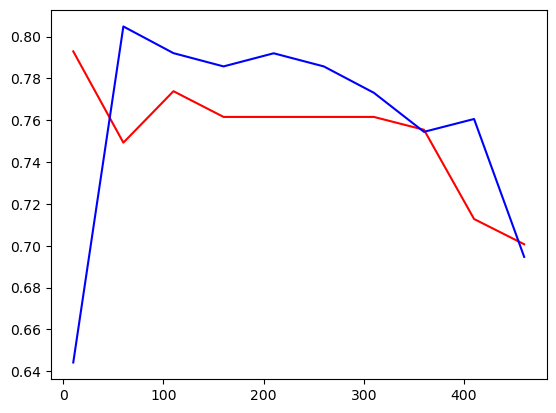

In [10]:
fig, ax = plt.subplots()
xlabels= [x for x in range(10, 500, 50)]
ax.plot(xlabels, km_ari_means, color="red")
ax.plot(xlabels, gm_ari_means, color="blue")

sil: 0.43568602
ARI: 0.69472052558255
sil: 0.4315641
ARI: 0.7067418476807494


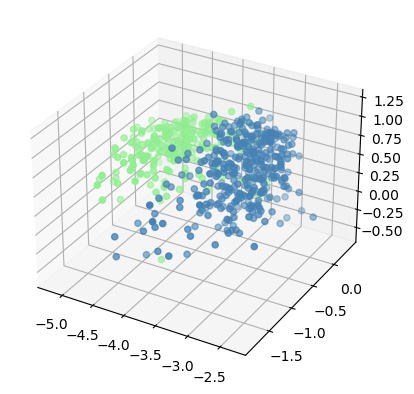

In [14]:
# TSNE BC ground truth plot
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=3, perplexity=500).fit_transform(X)

labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)

print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)
print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

df = pd.DataFrame(data=X_t)
df["labels"] = y
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

sil: 0.4313147
ARI: 0.7067418476807494
sil: 0.43541193
ARI: 0.69472052558255


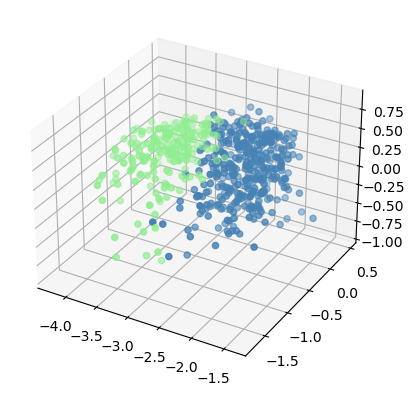

In [10]:
# BC TSNE Kmeans labels 
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=3, perplexity=500).fit_transform(X)


labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)
print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)

print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

df = pd.DataFrame(data=X_t)
df["labels"] = labels
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

sil: 0.4356035
ARI: 0.69472052558255
sil: 0.43148848
ARI: 0.7067418476807494


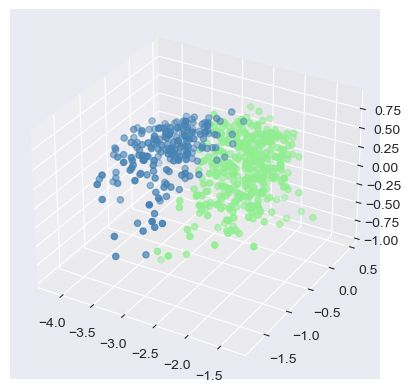

In [28]:
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=3, perplexity=5).fit_transform(X)

labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)

print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)
print("sil:", metrics.silhouette_score(X_t, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))

df = pd.DataFrame(data=X_t)
df["labels"] = labels
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

In [14]:
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
ts = TSNE(n_components=2, perplexity=50).fit(X)
print(ts.kl_divergence_)

0.08710253983736038


<Axes: xlabel='0', ylabel='1'>

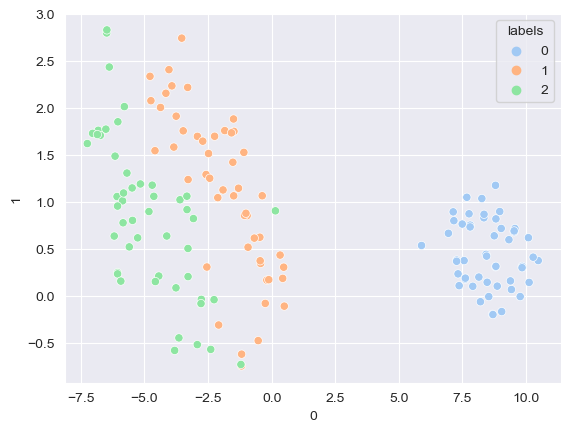

In [31]:
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = TSNE(n_components=2, perplexity=50).fit_transform(X)

df = pd.DataFrame(data=X_t)
df["labels"] = y
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]
df3 = df.loc[df['labels'] == 2]

sns.set_style("darkgrid")
sns.scatterplot(data=df, x=df[0], y=df[1],  hue="labels",palette="pastel")


X norm: 3.4644999999999997
PCA RMSE error [0.6599140560689577, 0.5703524821355308, 0.407281408122605, 0.10418693376513048]
GRP RMSE error [0.7984212430293697, 0.5697051474363111, 0.3736084896265339, 1.9735896325231297e-15]
ICA RMSE error [0.2972949100656046, 0.1721723600513464, 0.0747388630015928, 1.1991311250803857e-15]


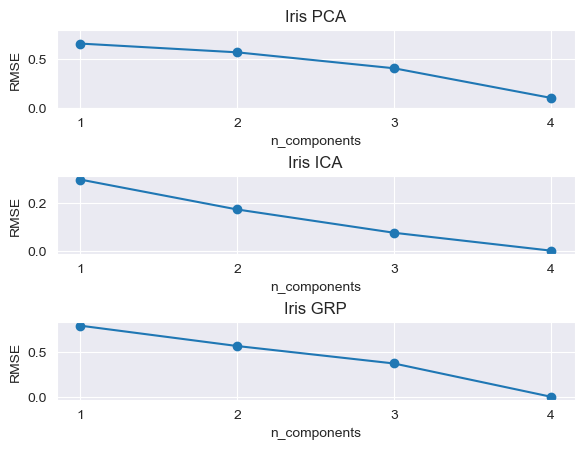

In [107]:
X,y = datasets.load_iris(return_X_y=True)
norm_x = np.mean(X)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

pca_err = []
ica_err = []
grp_err = []


for k in range(1,5):
    p_err = []
    i_err = []
    g_err = []
    
    for i in range(5):
        pca = PCA(n_components=k, random_state=np.random.randint(1000))
        X_pca = grp.fit_transform(X)
        X_pca_rec = grp.inverse_transform(X_pca)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_pca_rec), squared=False)
        p_err.append(err)
        
        ica = FastICA(n_components=k, random_state=np.random.randint(1000))
        X_ica = ica.fit_transform(X)
        X_ica_rec = ica.inverse_transform(X_ica)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_ica_rec), squared=False)
        i_err.append(err)
        
        grp = random_projection.GaussianRandomProjection(n_components=k, random_state=np.random.randint(1000))
        X_grp = grp.fit_transform(X)
        X_grp_rec = grp.inverse_transform(X_grp)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_grp_rec), squared=False)
        g_err.append(err)
        
    
    pca_err.append(np.mean(p_err))
    grp_err.append(np.mean(g_err))
    ica_err.append(np.mean(i_err))

    
print("X norm:",norm_x)
print("PCA RMSE error", pca_err)
print("GRP RMSE error", grp_err)
print("ICA RMSE error", ica_err)

fig, ax = plt.subplots(3)
fig.tight_layout(pad = 3.0)
x_labels = [x for x in range(1,5)]

ax[0].set_title("Iris PCA")
ax[0].set_xlabel("n_components")
ax[0].set_xticks([1,2,3,4])
ax[0].set_ylabel("RMSE")
ax[0].plot(x_labels, pca_err, marker= 'o')
ax[0].set_ylim(0,.8)

ax[1].set_title("Iris ICA")
ax[1].set_xlabel("n_components")
ax[1].set_xticks([1,2,3,4])
ax[1].set_ylabel("RMSE")
ax[1].plot(x_labels, ica_err, marker= 'o')


ax[2].set_title("Iris GRP")
ax[2].set_xlabel("n_components")
ax[2].set_xticks([1,2,3,4])
ax[2].set_ylabel("RMSE")
ax[2].plot(x_labels, grp_err, marker= 'o')


In [ ]:
# BC Reconstruction error
X,y = datasets.load_breast_cancer(return_X_y=True)
norm_x = np.mean(X)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

pca_err = []
ica_err = []
grp_err = []


for k in range(1,31):
    p_err = []
    i_err = []
    g_err = []
    
    for i in range(5):
        pca = PCA(n_components=k, random_state=np.random.randint(1000))
        X_pca = pca.fit_transform(X)
        X_pca_rec = pca.inverse_transform(X_pca)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_pca_rec), squared=False)
        p_err.append(err)
        
        ica = FastICA(n_components=k, random_state=np.random.randint(1000), whiten=False)
        X_ica = ica.fit_transform(X)
        X_ica_rec = ica.inverse_transform(X_ica)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_ica_rec), squared=False)
        i_err.append(err)
        
        grp = random_projection.GaussianRandomProjection(n_components=k, random_state=np.random.randint(1000))
        X_grp = grp.fit_transform(X)
        X_grp_rec = grp.inverse_transform(X_grp)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_grp_rec), squared=False)
        g_err.append(err)
        
    
    pca_err.append(np.mean(p_err))
    grp_err.append(np.mean(g_err))
    ica_err.append(np.mean(i_err))

    
print("X norm:",norm_x)
print("PCA RMSE error", pca_err)
print("GRP RMSE error", grp_err)
print("ICA RMSE error", ica_err)

fig, ax = plt.subplots()
fig.tight_layout(pad = 3.0)
x_labels = [x for x in range(1,31)]

ax.set_title("Cancer PCA")
ax.set_xlabel("n_components")
ax.set_xticks([x for x in range(0,31,5)])
ax.set_ylabel("RMSE")


ax.plot(x_labels, pca_err, marker= 'o',label="PCA")
ax.plot(x_labels, ica_err, marker= 'd',label="ICA")
ax.plot(x_labels, grp_err, marker= '^',label="GRP")

plt.legend(loc="upper right")

X norm: 61.890712339519624
RMSE error [33.76930259283625, 33.436543095628984, 33.735016965224844, 33.78274563765339, 31.193259025048484, 31.37879804125131, 28.549464262254336, 28.688981149054648, 29.376189749800723, 26.215485056383443, 26.612743022233715, 26.057594274408345, 25.32763034361171, 24.935849599572055, 22.338340814433412, 21.844435766692918, 22.439976097077807, 21.35951639561127, 19.139480297747784, 18.13724246658439, 17.536699845040904, 14.937579292046825, 14.534873677950266, 15.346169183365019, 12.272501543800251, 11.529449176087748, 9.420968370837176, 7.6149795175977, 4.762853350551306, 6.428552834863835e-13]
percent error [0.5456279515347126, 0.5402513855746729, 0.545073981054888, 0.5458451577084499, 0.5040054936503029, 0.507003342748969, 0.46128834493999504, 0.4635425908765251, 0.47464617289665423, 0.42357704517231476, 0.42999574598918366, 0.4210259227824327, 0.409231520953735, 0.40290131842043037, 0.3609320360038822, 0.3529517586881028, 0.36257420942219487, 0.345116667

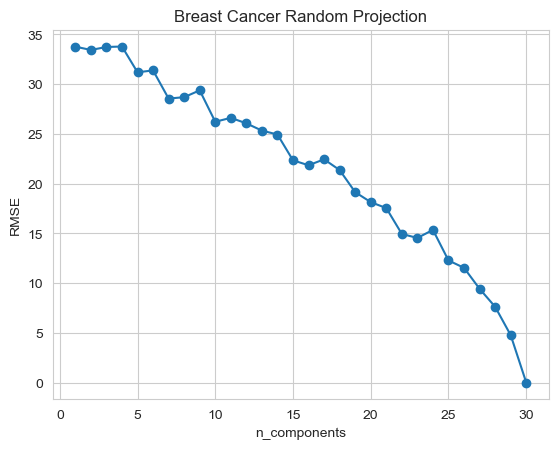

In [178]:
X,y = datasets.load_breast_cancer(return_X_y=True)
norm_x = np.mean(X)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

grp_err = []

for k in range(1,31):
    errors = []
    for i in range(30):
        grp = random_projection.GaussianRandomProjection(n_components=k, random_state=np.random.randint(1000))
        X_grp = grp.fit_transform(X)
        X_rec = grp.inverse_transform(X_grp)
        err = mean_squared_error(scaler.inverse_transform(X), scaler.inverse_transform(X_rec), squared=False)
        errors.append(err)
    
    grp_err.append(np.mean(errors))


err_perc = [x/norm_x for x in grp_err]
    
print("X norm:",norm_x)
print("RMSE error", grp_err)
print("percent error", err_perc)

fig, ax = plt.subplots()
x_labels = [x for x in range(1,31)]
ax.set_title("Breast Cancer Random Projection")
ax.set_xlabel("n_components")
ax.set_ylabel("RMSE")
ax.plot(x_labels, grp_err, marker= 'o')

In [184]:
np.sum([1,2,3])

6

<Axes: xlabel='0', ylabel='1'>

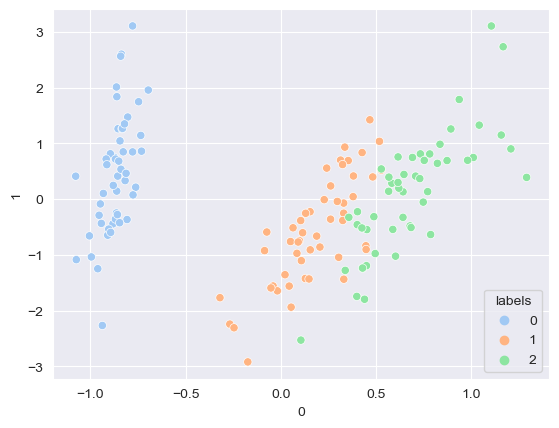

In [62]:
# Iris GRP visualization
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = random_projection.GaussianRandomProjection(n_components=2).fit_transform(X)

df = pd.DataFrame(data=X_t)
df["labels"] = y
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]
df3 = df.loc[df['labels'] == 2]

sns.set_style("darkgrid")
sns.scatterplot(data=df, x=df[0], y=df[1],  hue="labels",palette="pastel")


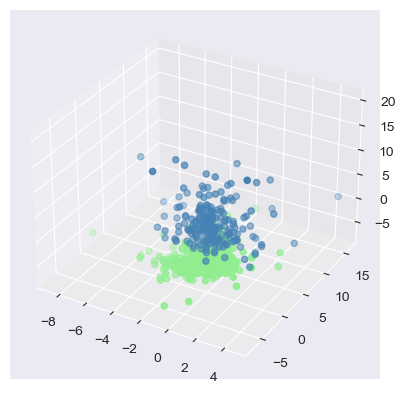

In [79]:
# BC GRP visualization
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = random_projection.GaussianRandomProjection(n_components=3).fit_transform(X)

df = pd.DataFrame(data=X_t)
df["labels"] = labels
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

In [117]:
X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
k = [np.abs(x) for x in kurtosis(X)]
print(k)

[0.8275836739140559, 0.7411454202242798, 0.9531650486734993, 3.6097612648231108, 0.8379453502657075, 1.6251395163112825, 1.9705916515788982, 1.0466802239531914, 1.2661169747104637, 2.969016898285876, 17.521162189626576, 5.2917528883272915, 21.203774810425656, 48.7671956105043, 10.36753719546627, 5.050966022625369, 48.422562092419426, 5.070839733646986, 7.816387992680529, 26.039949768414537, 0.9252876046135068, 0.21180937803143562, 1.0502426838462844, 4.347330804638664, 0.5027597471319547, 3.0021202085153558, 1.5905680713087982, 0.5413670700179041, 4.395073293755764, 5.188111282410638]


In [118]:
X,y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
print(kurtosis(X))
X,y = datasets.load_iris(return_X_y=True,as_frame=True)
print(kurtosis(X['petal width (cm)']))


[-0.57356795  0.18097632 -1.39553589 -1.33606741]
-1.336067405231553


In [87]:
X,y = datasets.load_iris(return_X_y=True)
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


var [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
eigen [86.93235745 56.90677266 40.04263937 33.57058877 30.62887007 26.2104161
 19.60102663 16.46800391 15.4017255  14.12602481 12.93205441 12.19019359
 11.71889139  9.4519063   7.31866075  6.74106325  5.81360925  5.47175363
  5.30591648  4.21066503  4.12971871  3.95133143  3.72155031  3.20519874
  2.96796958  2.15709923  1.98150547  0.95096438  0.65273958  0.27514088]


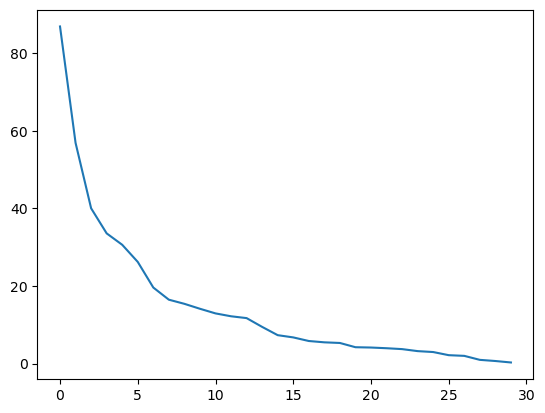

In [26]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

pca = PCA()
pca.fit(X)
print("var",pca.explained_variance_ratio_)
print("eigen", pca.singular_values_)
fig, ax = plt.subplots() 
ax.plot(pca.singular_values_)

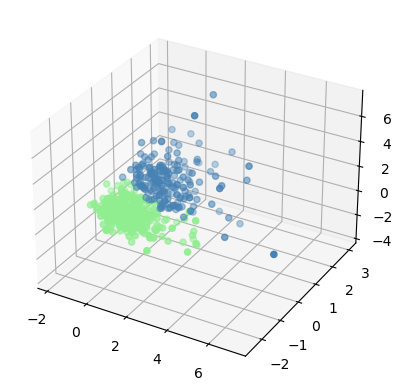

In [4]:
#BC ICA

X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = FastICA(n_components=3).fit_transform(X)

labels = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit_predict(X_t)


df = pd.DataFrame(data=X_t)
df["labels"] = labels
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")

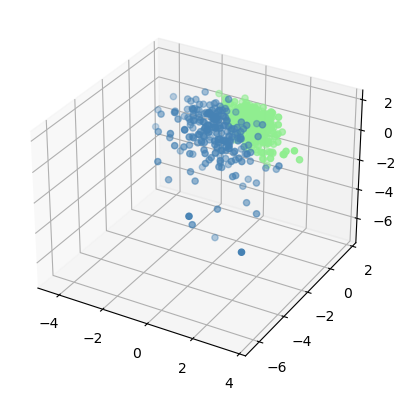

In [5]:
#BC ICA

X,y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_t = FastICA(n_components=3).fit_transform(X)

labels = GaussianMixture(n_components=2, random_state=np.random.randint(100)).fit_predict(X_t)


df = pd.DataFrame(data=X_t)
df["labels"] = labels
df1 = df.loc[df['labels'] == 0]
df2 = df.loc[df['labels'] == 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df1[0], df1[1], df1[2], color="lightgreen")
ax.scatter(df2[0], df2[1], df2[2], color="steelblue")